# Data Analysis

- Identify possible outliers on each set

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 40)

In [2]:
df = pd.read_csv('train.csv')

# Reconstructing dummy variables...
dummies_freq = df[["issuance after transaction", "monthly issuance", "weekly issuance"]]

df['frequency'] = pd.Series(dummies_freq.columns[np.where(dummies_freq!=0)[1]])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   loan_id                                          328 non-null    int64  
 1   account_id                                       328 non-null    int64  
 2   status                                           328 non-null    int64  
 3   loan_date                                        328 non-null    int64  
 4   loan_amount                                      328 non-null    int64  
 5   duration                                         328 non-null    int64  
 6   payments                                         328 non-null    int64  
 7   owner_district_id                                328 non-null    int64  
 8   client_age                                       328 non-null    int64  
 9   client_gender                   

In [3]:
df

,loan_id,account_id,status,loan_date,loan_amount,duration,payments,owner_district_id,client_age,client_gender,account_district_id,operation_count,amount_mean,amount_min,amount_max,amount_std,amount_last,amount_abs_min,amount_rangev,balance_mean,balance_min,balance_max,balance_std,balance_last,balance_abs_min,balance_rangev,type_count_in,type_count_out,type_mean_in,type_mean_out,disp_id_count,issuance after transaction,monthly issuance,weekly issuance,before_loan_amount,before_loan_balance,age_at_loan,underage,account_months_at_loan,months_from_first_trans_to_loan,days_from_last_trans_till_loan,owner_average salary,owner_no. of enterpreneurs per 1000 inhabitants,owner_Prague,owner_central Bohemia,owner_east Bohemia,owner_north Bohemia,owner_north Moravia,owner_south Bohemia,owner_south Moravia,owner_west Bohemia,frequency
0,5314,1787,1,1993,96396,12,8033,30,74,1,30,4,5025.000000,1100.0,9900.0,3774.806838,3300.0,1100.0,8800.0,12250.000000,1100.0,20100.0,8330.866301,20100.0,1100.0,19000.0,4,0,1.000000,0.000000,1,0,0,1,3300.0,20100.0,45,0,3,3,15,9650,100,0,0,0,0,0,0,0,1,weekly issuance
1,6820,9034,0,1993,38148,12,3179,1,56,1,1,29,1645.720690,-20600.0,32706.0,12844.874772,-9115.0,9.9,53306.0,37462.093103,900.0,62324.6,13293.431805,47725.8,900.0,61424.6,18,11,0.620690,0.379310,1,0,1,0,-9115.0,47725.8,28,0,5,5,2,12541,167,1,0,0,0,0,0,0,0,monthly issuance
2,6228,6034,1,1993,464520,60,7742,77,81,1,6,68,1284.857353,-41000.0,47757.0,18515.433732,290.7,30.0,88757.0,51760.016176,200.0,125943.1,27848.686708,101797.3,200.0,125743.1,31,37,0.455882,0.544118,1,0,0,1,290.7,101797.3,52,0,8,8,1,8909,113,0,0,0,0,1,0,0,0,weekly issuance
3,6111,5428,1,1993,174744,24,7281,24,73,1,24,32,1816.900000,-52600.0,47436.0,18855.750711,40175.0,14.6,100036.0,37485.456250,1000.0,105628.0,28302.653143,58140.9,1000.0,104628.0,16,16,0.500000,0.500000,1,0,1,0,40175.0,58140.9,45,0,5,5,3,8991,128,0,0,0,0,0,0,0,1,monthly issuance
4,7097,10266,1,1993,75624,24,3151,54,63,0,54,23,1824.130435,-31100.0,49887.0,21502.123351,-13500.0,50.5,80987.0,50009.908696,400.0,89754.8,20688.418049,41954.8,400.0,89354.8,15,8,0.652174,0.347826,1,0,1,0,-13500.0,41954.8,35,0,6,6,6,9897,140,0,0,0,0,0,0,1,0,monthly issuance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6354,6688,0,1996,22968,36,638,16,71,1,16,11,3530.090909,-3600.0,8200.0,4586.053446,8155.0,16.3,11800.0,23324.936364,1000.0,38831.0,11195.573958,38831.0,1000.0,37831.0,10,1,0.909091,0.090909,1,0,1,0,8155.0,38831.0,46,0,4,4,11,8427,107,0,0,0,0,0,1,0,0,monthly issuance
324,6805,8972,0,1996,45024,48,938,70,64,1,70,39,984.215385,-22100.0,31636.5,12758.414420,-17800.0,14.6,53736.5,41994.907692,800.0,63659.3,13151.510254,38384.3,800.0,62859.3,20,19,0.512821,0.487179,1,0,1,0,-17800.0,38384.3,39,0,7,7,4,10177,81,0,0,0,0,1,0,0,0,monthly issuance
325,6816,9017,1,1996,100224,48,2088,70,64,1,70,18,1743.727778,-15100.0,18792.0,8029.859466,-15100.0,26.5,33892.0,28124.933333,700.0,46487.1,9838.648370,31387.1,700.0,45787.1,15,3,0.833333,0.166667,1,0,1,0,-15100.0,31387.1,39,0,4,4,5,10177,81,0,0,0,0,1,0,0,0,monthly issuance
326,7194,10762,0,1996,68832,36,1912,1,62,0,1,53,972.467925,-24000.0,28353.0,11799.703118,-1500.0,14.6,52353.0,37557.054717,700.0,61939.6,12288.790411,51540.7,700.0,61239.6,24,29,0.452830,0.547170,1,0,1,0,-1500.0,51540.7,37,0,11,11,5,12541,167,1,0,0,0,0,0,0,0,monthly issuance


## Outliers
**...and what to do with them**

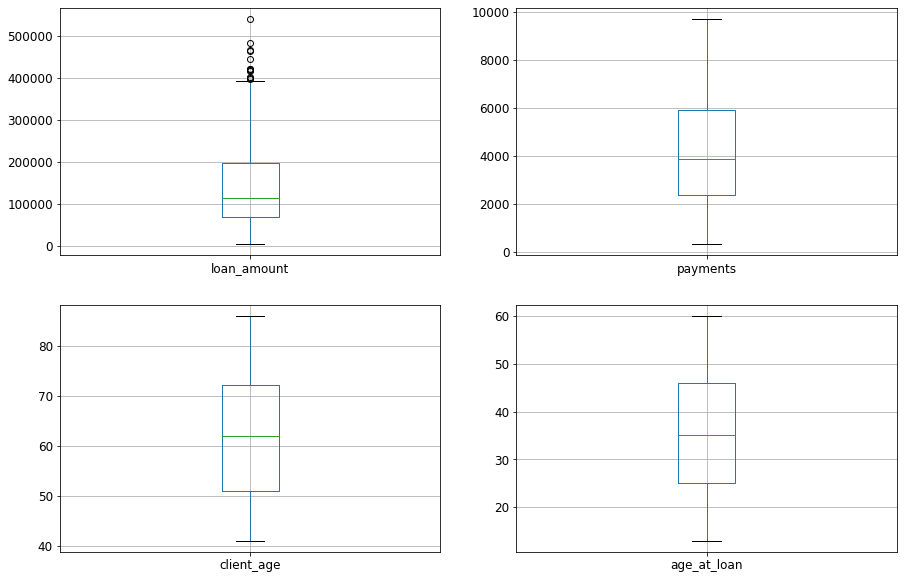

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

df.boxplot(column=['loan_amount'], fontsize=12, figsize=(7, 5), ax=axes[0,0])
df.boxplot(column=['payments'], fontsize=12, figsize=(7, 5), ax=axes[0,1])
df.boxplot(column=['client_age'], fontsize=12, figsize=(7, 5), ax=axes[1,0])
df.boxplot(column=['age_at_loan'], fontsize=12, figsize=(7, 5), ax=axes[1,1])

plt.savefig('plots/outliers.png')
plt.show()

By analysing this data, we can see there are some outliers on the `loan_amount` variable, we've decided to keep the outliers since, on this particular problem, we are not looking for consistency but rather unusual behaviours. We can identify these behaviours if we have data to support such deviations.

## Histograms and frequency plots

<AxesSubplot:xlabel='status', ylabel='count'>

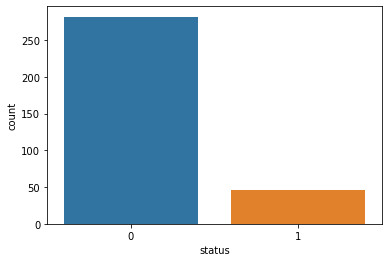

In [5]:
sns.countplot(x="status",data=df)

By this plot, we can see that there are far more examples for the negative class, and since `0` represents a client without problems on paying the loan, it makes sense for this problem because a bank, tipically, has profit, and won't have as much clients with debt. However, this makes our job a bit more complicated since the classes are way too unbalanced.

<AxesSubplot:xlabel='underage', ylabel='count'>

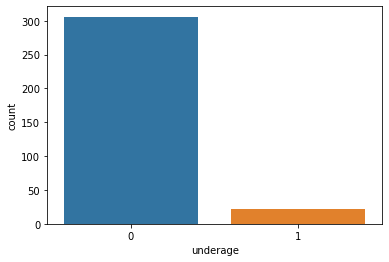

In [6]:
sns.countplot(x="underage",data=df)

We can also verify some clients have issued a loan while being underage, this of course can be a problem for the bank, and they should take it under consideration. In some countries, minors do not have the obligation to pay for debt, and therefore, a bank cannot enforce the collection by any means. In such countries issuing a loan for a minor can be a potential threat to a bank's profit.

<AxesSubplot:>

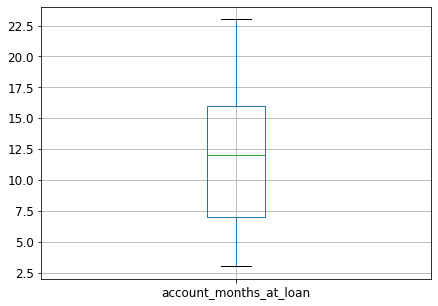

In [7]:
df.boxplot(column=['account_months_at_loan'], fontsize=12, figsize=(7, 5))

By analysing this plot alone we can assume there are no irregularities regarding how old the account is when the loan was issued, but we need to analyse this data with the `status` column.

## Correlation Matrix

<AxesSubplot:>

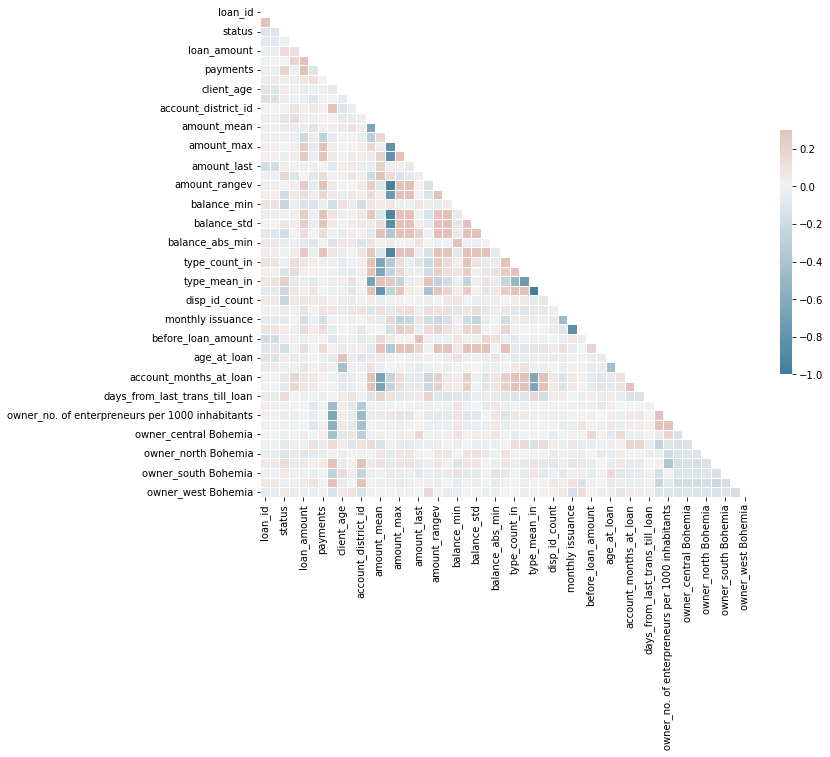

In [8]:
# sns.set_theme(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

corr

,loan_id,account_id,status,loan_date,loan_amount,duration,payments,owner_district_id,client_age,client_gender,account_district_id,operation_count,amount_mean,amount_min,amount_max,amount_std,amount_last,amount_abs_min,amount_rangev,balance_mean,balance_min,balance_max,balance_std,balance_last,balance_abs_min,balance_rangev,type_count_in,type_count_out,type_mean_in,type_mean_out,disp_id_count,issuance after transaction,monthly issuance,weekly issuance,before_loan_amount,before_loan_balance,age_at_loan,underage,account_months_at_loan,months_from_first_trans_to_loan,days_from_last_trans_till_loan,owner_average salary,owner_no. of enterpreneurs per 1000 inhabitants,owner_Prague,owner_central Bohemia,owner_east Bohemia,owner_north Bohemia,owner_north Moravia,owner_south Bohemia,owner_south Moravia,owner_west Bohemia
loan_id,1.000000,0.999851,-0.121917,-0.077700,-0.039489,-0.016103,-0.048928,0.051868,-0.114154,-0.142608,-0.003671,0.042746,-0.031552,-0.034032,0.044084,0.016653,-0.183513,-0.027936,0.040685,0.037019,0.101696,0.032116,0.003451,-0.095478,0.064207,0.028794,0.090230,0.016899,0.091291,-0.091291,0.060361,-0.022979,-0.070664,0.093920,-0.177628,-0.092954,-0.117845,0.051815,-0.014209,-0.014209,-0.059479,0.042920,0.016076,0.019185,-0.005380,-0.010398,-0.050692,0.050362,-0.028101,0.057093,-0.068690
account_id,0.999851,1.000000,-0.122633,-0.077154,-0.039255,-0.015799,-0.048210,0.052254,-0.113583,-0.140769,-0.003619,0.042885,-0.031164,-0.033757,0.044050,0.016746,-0.184771,-0.026719,0.040514,0.036657,0.102596,0.031502,0.003097,-0.097164,0.065247,0.028154,0.091008,0.016715,0.093045,-0.093045,0.059682,-0.024533,-0.071357,0.095676,-0.179103,-0.094656,-0.117253,0.051018,-0.014594,-0.014594,-0.057699,0.043845,0.016170,0.020149,-0.007228,-0.012854,-0.050929,0.052289,-0.026723,0.056423,-0.067622
status,-0.121917,-0.122633,1.000000,-0.024336,0.128237,0.003537,0.168436,0.024623,0.032889,0.022487,0.001332,-0.091208,0.056448,0.006006,-0.004996,-0.029760,0.024059,0.167737,-0.005822,-0.193985,-0.226679,-0.019865,0.083467,-0.163435,-0.055458,-0.012576,-0.019421,-0.122053,0.217682,-0.217682,-0.219900,0.056889,-0.071589,0.044766,0.028380,-0.164120,0.026815,-0.038096,-0.078025,-0.078025,0.122921,-0.013187,-0.036389,0.006637,-0.033000,-0.070024,-0.097689,0.117454,0.049595,-0.033280,0.054602
loan_date,-0.077700,-0.077154,-0.024336,1.000000,0.097280,0.169814,-0.026544,0.034887,-0.015935,-0.026605,0.094197,0.136792,-0.049804,-0.046530,0.022534,0.028848,0.011514,-0.113543,0.037216,0.062063,-0.040094,0.043196,0.030909,0.012118,-0.038349,0.044382,0.125776,0.135039,-0.075097,0.075097,0.049559,-0.023706,-0.008255,0.024184,0.021639,0.013212,0.057717,-0.017829,0.171145,0.171145,0.000169,-0.009660,-0.042010,-0.019400,-0.023249,-0.020325,0.057815,0.059595,0.024874,-0.031847,-0.042343
loan_amount,-0.039489,-0.039255,0.128237,0.097280,1.000000,0.593210,0.666213,0.051138,-0.051493,-0.050296,0.011210,0.033855,-0.044292,-0.214466,0.246626,0.243583,-0.038880,-0.006265,0.241177,0.124376,-0.127031,0.233356,0.226052,0.124137,-0.082736,0.236900,0.072389,0.012924,-0.038180,0.038180,0.059715,0.092179,-0.165974,0.128743,-0.034172,0.125584,-0.046909,0.087283,0.073593,0.073593,-0.018977,-0.004401,0.005017,-0.008090,0.046172,-0.022469,-0.091277,0.052427,-0.026899,0.052592,-0.037172
duration,-0.016103,-0.015799,0.003537,0.169814,0.593210,1.000000,-0.096113,0.112890,-0.017312,-0.100833,0.050981,0.024045,-0.103262,0.049852,-0.079988,-0.050157,-0.021164,-0.091230,-0.067116,-0.038194,-0.114239,-0.036018,-0.046904,0.000280,-0.091891,-0.032287,0.044014,0.012854,-0.068561,0.068561,0.051691,0.002110,-0.036754,0.040012,-0.014703,0.000019,-0.007869,0.019854,0.058356,0.058356,-0.010229,-0.074391,-0.047780,-0.082757,-0.003798,0.096940,-0.073176,0.015843,-0.049562,0.090897,-0.035199
payments,-0.048928,-0.048210,0.168436,-0.026544,0.666213,-0.096113,1.000000,0.002483,-0.031158,0.020697,0.011377,0.010939,0.030222,-0.278196,0.358672,0.318252,0.008513,0.135742,0.331753,0.176371,-0.050814,0.29773

We've decided to remove features with correlation higher than `0.98`, this is due to the fact that we want to take advantage of as much features as we can, but we dont want feature that wont add much information to the table.

In [10]:
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.98:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features

{'account_id',
 'age_at_loan',
 'balance_rangev',
 'before_loan_balance',
 'months_from_first_trans_to_loan',
 'type_count_out',
 'type_mean_out'}

These features were removed since they have a correlation higher than `0.98` to other features.

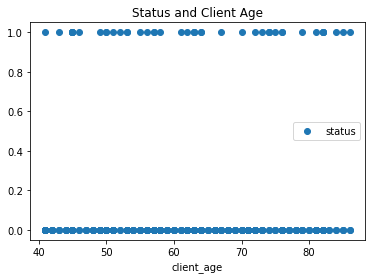

In [11]:
df.plot(x='client_age', y='status', style='o', title='Status and Client Age')

plt.show()

## SAS Studio Plots

In [12]:
df.to_csv('analysis.csv', index=False)

![age_at_loan](plots/age_at_loan.png)

We can see that the `age at loan` is somewhat irrelevant to the outcome of the loan

---

![client_age](plots/client_age.png)

By analysing the plot above, we can see there are some elderly people with debt, this can be a problem for the bank since the loan could remain unpaid should the person die meanwhile.

---

![loan_amount](plots/loan_amount.png)

The plot above tells us, that while the "successful" loans are mostly low amount loans, the "failed" loans contain around 5 loans for more than `475000`. It is an obvious to assume a low amount loan would be payed without problems, and it's also obviously assumed that an extremely high amount loan would have several factors worth exploring and analysing.

---

![duration](plots/duration.png)

We cannot infer as much from the `durantion` column since the distribution is quite the same, there's a slight variation around the 50 to 60 months, but nothing worth exploring in our opinion.

---

![operation](plots/operation.png)

This plot tells us, in average, a person who pays the loan accordingly also issues more transactions.

---

| frequency | N Obs  | Mean | N |
|---|---|---|---|
|  issuance after transaction | 18 |  0.2222222 | 18  |
| monthly issuance  | 259 | 0.1274131  | 259  |
|  weekly issuance | 51 |  0.1764706 |  51 |

We can also see that while there are not many examples of people with `issuance after transaction` extract frequency, the average for the positive class is higher than the others, with `weekly issuance` following.
We can assume people with `monthly issuance` are more expected to pay the loan than the others.

---

![account_months](plots/account_months.png)

We can assume that "young" accounts are more likely to **not** pay the loan properly, while accounts with some age (months) tend to pay the loan.

---

![date_till_loan](plots/date_till_loan.pdf)

In the first plot we can see that, in average, an account with a wider time range between the first transaction and the loan issuance is more likely to pay the loan properly. And in the second plot we can see that the accounts related to "successful" loans tend to have a thiner time range between the last transaction and the loan issuance.

---

![demographic](plots/demographic.pdf)

We can see that, having an higher average salary and a higher number of enterpreneurs per 1000 habitants can lead to a more successful loan, however, this difference is not so noticeable as one might've expected.

---

![type](plots/type.pdf)

While the number of "in" (credit) operations does not influence the outcome of the loan by a significant factor, on the other hand, the number of withdrawals seems directly related to the outcome of the loan.

---